In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import Funciones as fn
from collections import Counter

In [2]:
movies=pd.read_csv('./Database/movies_normalizado.csv',delimiter = ',',encoding = "utf-8")
titles=pd.read_csv('./Database/titles.csv',delimiter = ',',encoding = "utf-8")
franchises=pd.read_csv('./Database/franchise.csv',delimiter = ',',encoding = "utf-8")
languages=pd.read_csv('./Database/languages.csv',delimiter = ',',encoding = "utf-8")
status=pd.read_csv('./Database/status.csv',delimiter = ',',encoding = "utf-8")

In [3]:
movies=movies.merge(titles[["Id_movie", "title"]], left_on="Id_movie", right_on="Id_movie", how="left")
movies=movies.merge(franchises[["Id_franchise", "franchise"]], left_on="Id_franchise", right_on="Id_franchise", how="left")
movies=movies.merge(languages[["Id_language", "language"]], left_on="Id_language", right_on="Id_language", how="left")
movies=movies.merge(status[["Id_status", "status"]], left_on="Id_status", right_on="Id_status", how="left")

In [4]:
movies1=movies.drop(columns=["Id_movie","Id_language","Id_status","Id_franchise","overview"])

In [5]:
for columna in movies1.columns:   #transformo str-->list en as columnas que tienen listas 
    if type(movies1.loc[0,columna])==str and movies1.loc[0,columna].startswith("["):
        movies1[columna]=movies1[columna].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [6]:
movies1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45346 non-null  int64  
 1   popularity            45346 non-null  float64
 2   release_date          45346 non-null  object 
 3   revenue               45346 non-null  float64
 4   duration              45346 non-null  float64
 5   vote_average          45346 non-null  float64
 6   vote_count            45346 non-null  float64
 7   genres                45346 non-null  object 
 8   production_companies  45346 non-null  object 
 9   production_countries  45346 non-null  object 
 10  return                45346 non-null  float64
 11  release_year          45346 non-null  int64  
 12  title                 45346 non-null  object 
 13  franchise             45346 non-null  object 
 14  language              45346 non-null  object 
 15  status             

CANTIDAD DE PELÍCULAS POR AÑO

release_year
1874       1
1878       1
1883       1
1887       1
1888       2
        ... 
2015    1904
2016    1604
2017     532
2018       5
2020       1
Name: count, Length: 135, dtype: int64


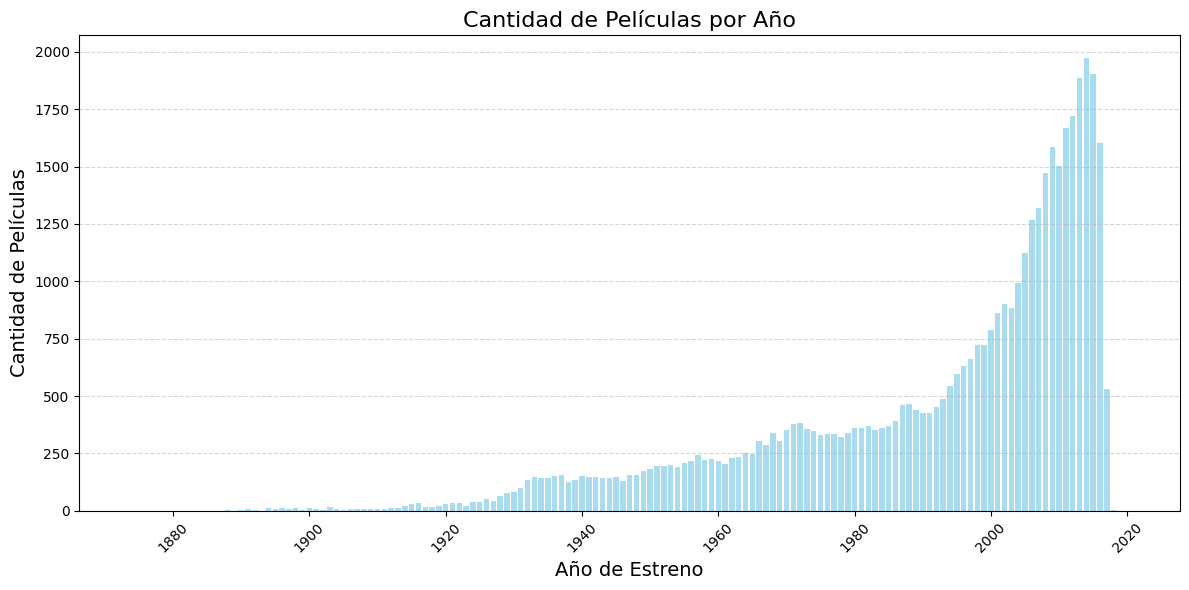

In [7]:
# Filtrar las columnas necesarias
movies_by_year = movies1['release_year'].value_counts().sort_index()
print(movies_by_year)
# Crear la figura
plt.figure(figsize=(12, 6))

# Crear el histograma
plt.bar(movies_by_year.index, movies_by_year.values, color='skyblue', alpha=0.7)

# Configurar etiquetas y título
plt.title('Cantidad de Películas por Año', fontsize=16)
plt.xlabel('Año de Estreno', fontsize=14)
plt.ylabel('Cantidad de Películas', fontsize=14)

# Ajustar diseño
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Tiene micho sentido que la cantidad de películas por año aumente, ya que, con los años, los avances tecnológicos facilitaron la producción y el acceso a este arte. Sin embargo, hay un error en el número de películas de 2017 ya que estos deberían ser mucho mayores.

PROMEDIOS DE DURACION DE LAS PELICULAS A LO LARGO DE LOS AÑOS:

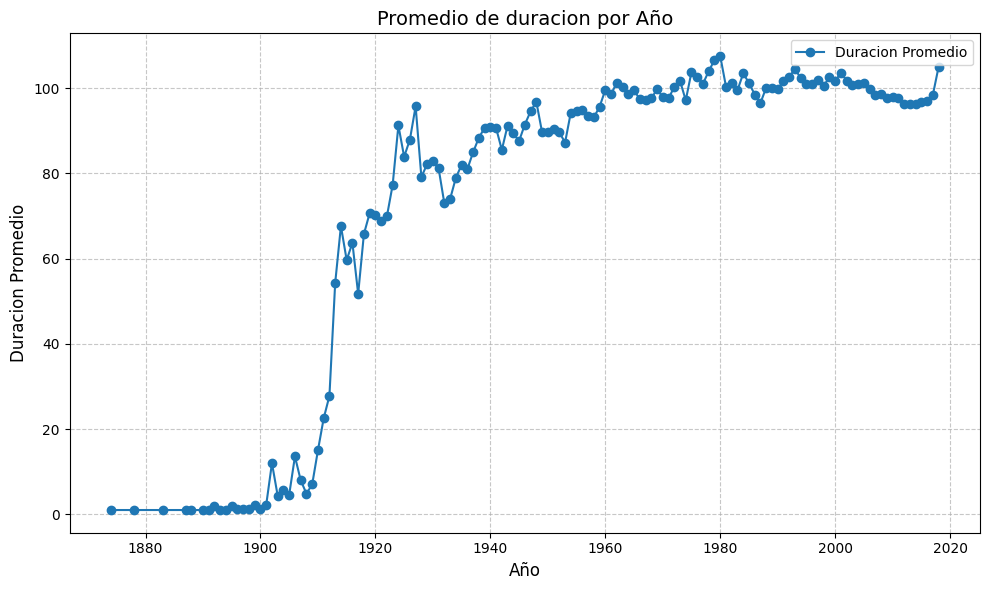

In [21]:
# Filtrar las filas donde 'duration' sea diferente de 0
movies_filtrado = movies1[movies1['duration'] != 0]

# Calcular los promedios por año para 'popularity'
promedio_duracion_por_anio = movies_filtrado.groupby('release_year')['duration'].mean()
#print(promedio_duracion_por_anio)
# Graficar la línea de tiempo
plt.figure(figsize=(10, 6))
plt.plot(promedio_duracion_por_anio.index, promedio_duracion_por_anio.values, marker='o', color='tab:blue', label='Duracion Promedio')
plt.title('Promedio de duracion por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Duracion Promedio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

Esta gráfica tiene sentido, ya que, en un comienzo, las películas eran cortometrajes con una duración promedio de 1 minuto debido a la dificultad de su producción. En cambio, más tarde, con los avances tecnológicos se facilitó tanto la producción, como la visualización. Esto permitió aumentar la duración de las películas hasta oscilar entre 1,5h (90min) y 2h (120min). Si quisiera producir una película hoy en día, lo mejor sería hacer una con una duración en este rango.

ANALICEMOS LA EVOLUCION DE LA POPULARIDAD POR AÑO

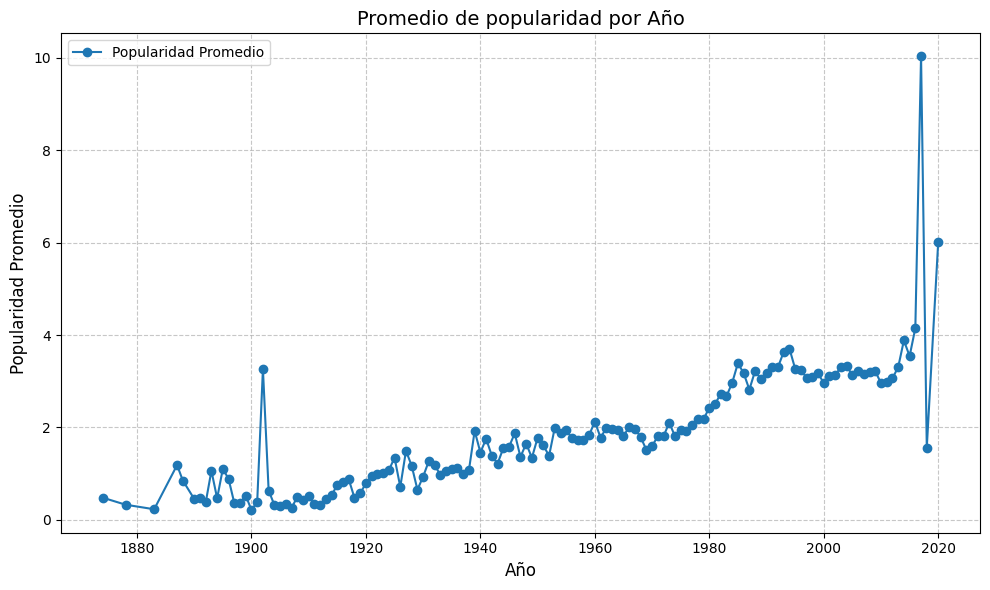

In [9]:
# Filtrar las filas donde 'popularity' sea diferente de 0
movies_filtrado = movies1[movies1['popularity'] != 0]

# Calcular los promedios por año para 'popularity'
promedio_popularity_por_anio = movies_filtrado.groupby('release_year')['popularity'].mean()

# Graficar la línea de tiempo
plt.figure(figsize=(10, 6))
plt.plot(promedio_popularity_por_anio.index, promedio_popularity_por_anio.values, marker='o', color='tab:blue', label='Popularidad Promedio')
plt.title('Promedio de popularidad por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Popularidad Promedio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

Veamos que pasa en los años 1902, 2017 y 2018

Año 1902: 
                  title  popularity
    A Trip to the Moon    6.321801
Jack and the Beanstalk    0.205349 

Promedio de popularidad en el año 2017 sin outliers: 7.7


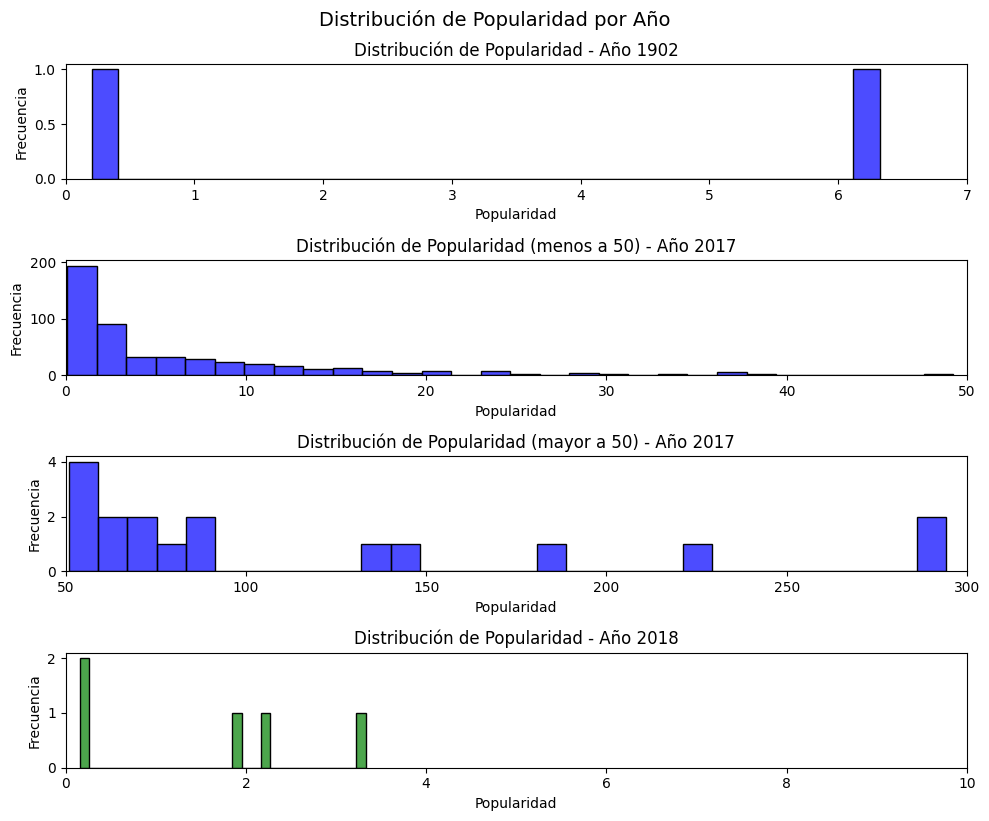

In [10]:
# Filtrar los datos para los años 1902, 2017 y 2018
movies_1902= movies1[movies1['release_year'] == 1902]
movies_2017 = movies1[movies1['release_year'] == 2017]
movies_2017mas50 = movies_2017[movies_2017["popularity"]>50]
movies_2017menos50 = movies_2017[movies_2017["popularity"]<50]
movies_2018 = movies1[movies1['release_year'] == 2018]

movies_2017menos100 = movies_2017[movies_2017["popularity"]<100]
#print(movies_2017mas100["title"])
print("Año 1902:","\n",movies_1902[["title","popularity"]].to_string(index=False),"\n")


print(f"Promedio de popularidad en el año 2017 sin outliers: {round(movies_2017menos100['popularity'].mean(),1)}")

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8), sharex=False)

# Distribución para 1902
sns.histplot(movies_1902['popularity'], bins=30, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Distribución de Popularidad - Año 1902')
axes[0].set_xlabel('Popularidad')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xlim(0, 7)

# Distribución para 2017
sns.histplot(movies_2017menos50['popularity'], bins=30, ax=axes[1], color='blue', alpha=0.7)
axes[1].set_title('Distribución de Popularidad (menos a 50) - Año 2017')
axes[1].set_xlabel('Popularidad')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xlim(0, 50)

sns.histplot(movies_2017mas50['popularity'], bins=30, ax=axes[2], color='blue', alpha=0.7)
axes[2].set_title('Distribución de Popularidad (mayor a 50) - Año 2017')
axes[2].set_xlabel('Popularidad')
axes[2].set_ylabel('Frecuencia')
axes[2].set_xlim(50, 300)

# Distribución para 2018
sns.histplot(movies_2018['popularity'], bins=30, ax=axes[3], color='green', alpha=0.7)
axes[3].set_title('Distribución de Popularidad - Año 2018')
axes[3].set_xlabel('Popularidad')
axes[3].set_ylabel('Frecuencia')
axes[3].set_xlim(0, 10)

# Ajustar el diseño
plt.tight_layout()
plt.suptitle('Distribución de Popularidad por Año', fontsize=14, y=1.02)

plt.show()

Lo primero a analizar es que en el año 1902 solo hay dos películas, de las cuales solo una tiene popularidad mayor a 1. Esta es "A Trip to the Moon", que es uno de los cortometrajes más icónicos de la historia del cine. Por otro lado, en el 2017 hay 6 películas que se pueden considerar outliers porque su puntuación de popularidad está por encima de 100, siendo que la mayor concentración de películas está por debajo de una puntuación de 40. Si quitamos estos outlier, el promedio de la puntuación de popularidad queda en 7.73, que no destaca tanto respecto al resto de años. Por último, en el 2018 solo hay 5 películas dentro del dataset, las cuales tienen una puntuación de popularidad muy baja, por eso el promedio ese año es muy bajo. El hecho de que el número de películas sea tan bajo respecto a, por ejemplo 2017, hace que sea un año que, en términos de popularidad no sea muy relevante para la evolución de este índice a lo largo de los años.

ANALICEMOS LOS RETORNOS PROMEDIO POR AÑO

release_year
1934    7.106667e+00
1935    3.136000e+00
1936    1.416669e+06
1937    1.242400e+02
1938    2.826667e+00
Name: return, dtype: float64 

release_year
1983         5.521463
1984         5.799123
1985         4.471818
1986     18524.778545
1987    217484.936667
1988         3.016494
1989         5.628226
Name: return, dtype: float64 

release_year
2010        3.825794
2011      125.418578
2012    13713.702537
2013     4548.846773
2014        4.196077
2015       16.373000
2016        3.323506
Name: return, dtype: float64


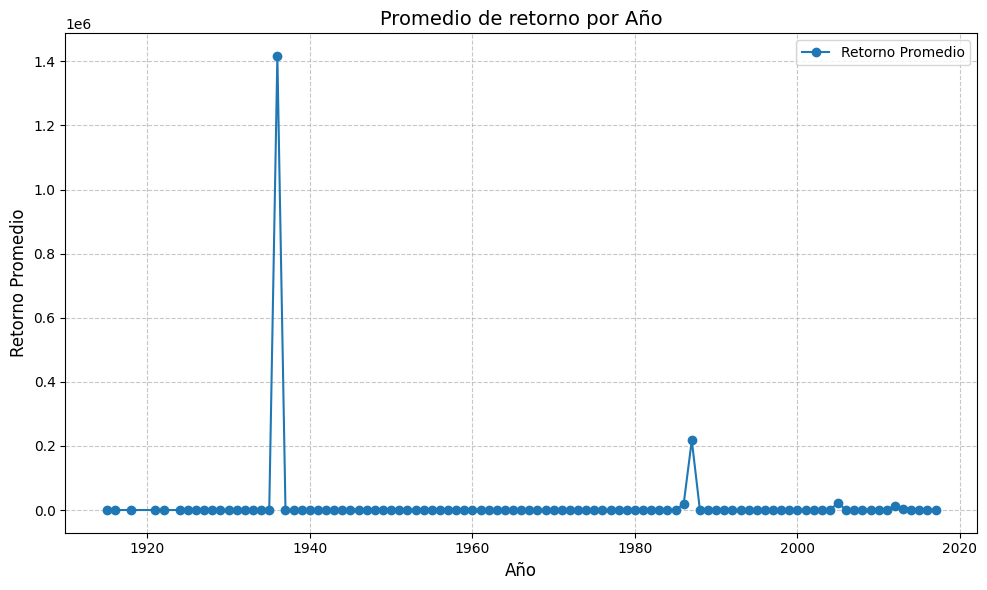

In [11]:
# Filtrar las filas donde 'revenue' sea diferente de 0
movies_filtrado = movies1[movies1['return'] != 0]

# Calcular los promedios por año para 'revenue'
promedio_return_por_anio = movies_filtrado.groupby('release_year')['return'].mean()
print(promedio_return_por_anio.iloc[15:20],"\n")
print(promedio_return_por_anio.iloc[-35:-28],"\n")
print(promedio_return_por_anio.iloc[-8:-1])
# Graficar la línea de tiempo
plt.figure(figsize=(10, 6))
plt.plot(promedio_return_por_anio.index, promedio_return_por_anio.values, marker='o', color='tab:blue', label='Retorno Promedio')
plt.title('Promedio de retorno por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Retorno Promedio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

¿Qué pasó en 1936, 1986 y 1987?

In [12]:
movies_1936= movies1[movies1['release_year'] == 1936]
movies_1936mas2 = movies_1936[movies_1936["return"]>2e6]
movies_1936_no_0=movies_1936[movies_1936["return"]>0]

movies_1986= movies1[movies1['release_year'] == 1986]
movies_1986_no_0=movies_1986[movies_1986["return"]>0]

movies_1987= movies1[movies1['release_year'] == 1987]
movies_1987_no_0=movies_1987[movies_1987["return"]>0]

print(f'Año 1936 con cantidad de peliculas {movies_1936.shape}. Las entradas con retorno no nulo son:','\n',movies_1936_no_0[['title',"budget","revenue",'return']])
print('\n',f'Año 1986 con cantidad de peliculas {movies_1986.shape}. Las entradas con retorno no nulo son:','\n',movies_1986_no_0[['title',"budget","revenue",'return']])
print('\n',f'Año 1987 con cantidad de peliculas {movies_1987.shape}. Las entradas con retorno no nulo son:','\n',movies_1987_no_0[['title',"budget","revenue",'return']])


Año 1936 con cantidad de peliculas (152, 16). Las entradas con retorno no nulo son: 
                                  title   budget    revenue      return
3339                      Modern Times        1  8500000.0  8500000.00
6894                  Mary of Scotland   864000  1276000.0        1.48
6897                        Swing Time   886000  2600000.0        2.93
10016                    San Francisco  1300000  5273000.0        4.06
11365  The Charge of the Light Brigade  1200000  2736000.0        2.28
16521               The Gorgeous Hussy  1119000  2019000.0        1.80

 Año 1986 con cantidad de peliculas (391, 16). Las entradas con retorno no nulo son: 
                                       title    budget      revenue      return
1056                                Platoon   6000000  138530565.0       23.09
1067                                Top Gun  15000000  356830601.0       23.79
1156                                 Aliens  18500000  183316455.0        9.91
1212         

Como puede verse, en 1936 hay muchas películas con 0 de recaudación que no suman al promedio, pero hay una que tiene una recaudación de 8500000 dólares debido a que figura que tiene un presupuesto de 1 dólar, lo que claramente es un error. Por otro lado, en 1986, el outlier se debe a que hay otro error en el presupuesto, ya que la película "The Karate Kid, Part II" tuvo un presupuesto de 13M de dólares y no 113 dólares. Por último, en 1937 hay un outlier igual al del año 1936, con un presupuesto de 1 dólar.

Linea de tiempo del promedio del retorno por año sin outliers 

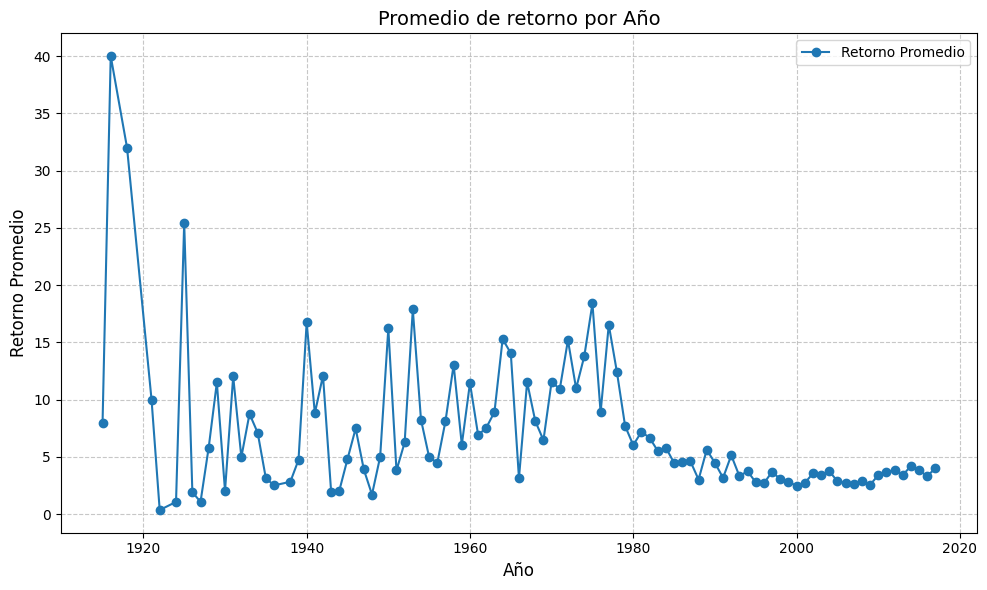

In [13]:
# Filtrar las filas donde 'revenue' sea diferente de 0
movies_filtrado = movies1[movies1['return']!=0]
movies_filtrado_menos100=movies_filtrado[movies_filtrado['return']<100]
# Calcular los promedios por año para 'revenue'
promedio_return_por_anio = movies_filtrado_menos100.groupby('release_year')['return'].mean()

# Graficar la línea de tiempo
plt.figure(figsize=(10, 6))
plt.plot(promedio_return_por_anio.index, promedio_return_por_anio.values, marker='o', color='tab:blue', label='Retorno Promedio')
plt.title('Promedio de retorno por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Retorno Promedio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

Puede verse que, por debajo de 1980, hay mucho ruido en los promedios de retorno. Veamos a que se debe

Recaudacion promedio por año:

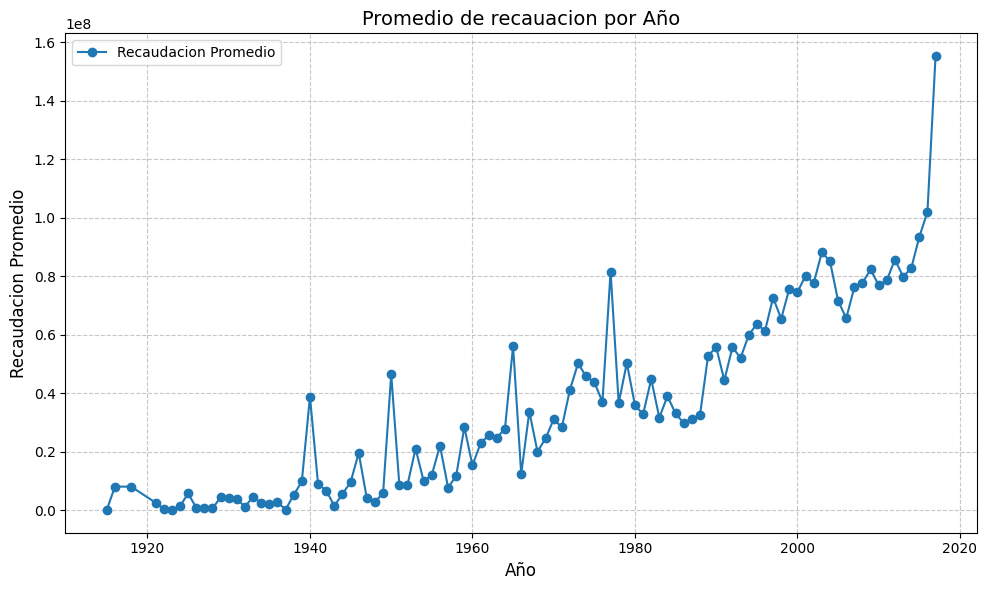

In [14]:
# Filtrar las filas donde 'revenue' sea diferente de 0
movies_filtrado = movies1[movies1['revenue'] != 0]
movies_filtrado_menos100=movies_filtrado[movies_filtrado['return']<100]

# Calcular los promedios por año para 'revenue'
promedio_budget_por_anio = movies_filtrado_menos100.groupby('release_year')['revenue'].mean()

# Graficar la línea de tiempo
plt.figure(figsize=(10, 6))
plt.plot(promedio_budget_por_anio.index, promedio_budget_por_anio.values, marker='o', color='tab:blue', label='Recaudacion Promedio')
plt.title('Promedio de recauacion por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Recaudacion Promedio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

En esta gráfica no hay muchas cosas a resaltar. Hay ruido, pero tiene sentido que la tendencia sea creciente, ya que con los años el arte del cine se volvió de más fácil acceso, entre otras cosas, lo que permitió un aumento en la recaudación promedio por año. 

Promedio de presupuestos por año:

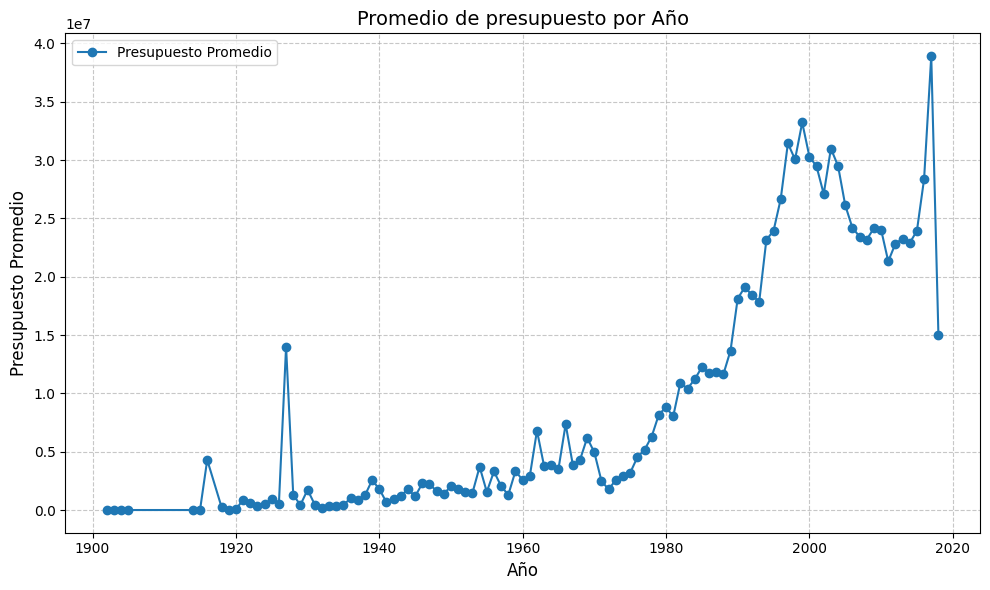

In [15]:
# Filtrar las filas donde 'budget' sea diferente de 0
movies_filtrado = movies1[movies1['budget'] != 0]
movies_filtrado_menos100=movies_filtrado[movies_filtrado['return']<100]

promedio_budget_por_anio = movies_filtrado_menos100.groupby('release_year')['budget'].mean()

# Graficar la línea de tiempo
plt.figure(figsize=(10, 6))
plt.plot(promedio_budget_por_anio.index, promedio_budget_por_anio.values, marker='o', color='tab:blue', label='Presupuesto Promedio')
plt.title('Promedio de presupuesto por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Presupuesto Promedio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

Veamos que pasa por debajo de 1980, que es el rango donde se veían problemas en la grafica de los retornos 

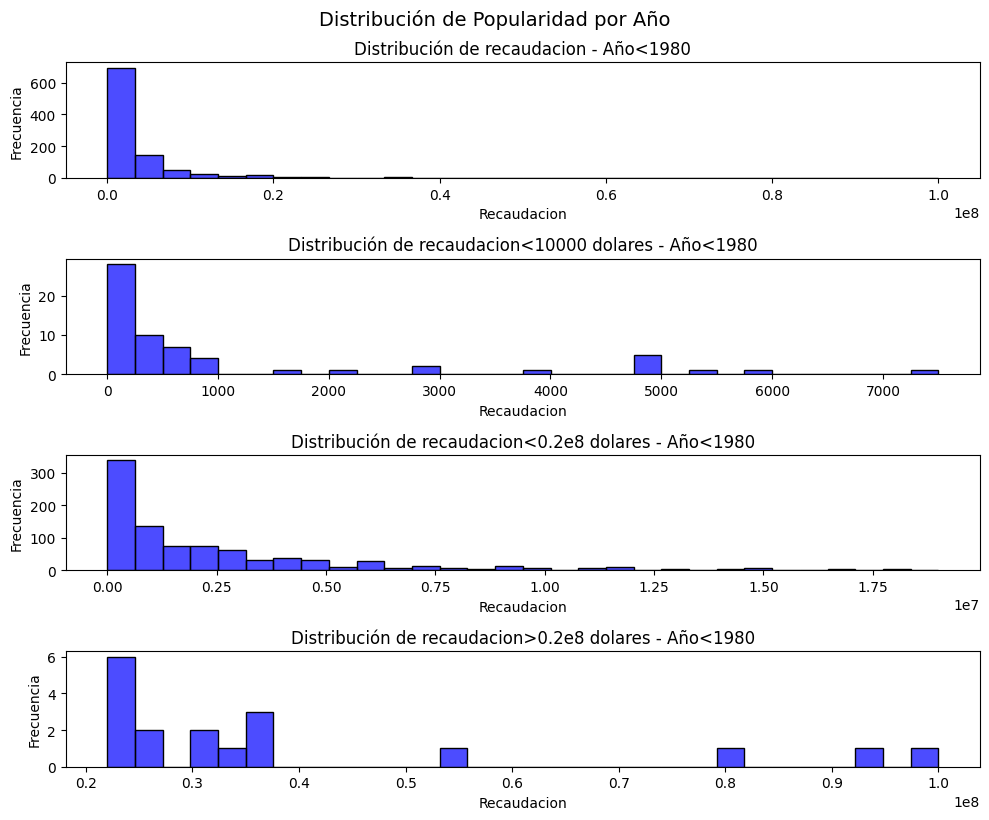

In [16]:
movies_filtrado_anio=movies_filtrado_menos100[movies_filtrado_menos100['release_year']<1980]
movies_filtrado_anio_menormenor=movies_filtrado_anio[movies_filtrado_anio['budget']<10000]
movies_filtrado_anio_menor=movies_filtrado_anio[movies_filtrado_anio['budget']<0.2e8]
movies_filtrado_anio_mayor=movies_filtrado_anio[movies_filtrado_anio['budget']>0.2e8]
# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8), sharex=False)

sns.histplot(movies_filtrado_anio['budget'], bins=30, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Distribución de recaudacion - Año<1980')
axes[0].set_xlabel('Recaudacion')
axes[0].set_ylabel('Frecuencia')

sns.histplot(movies_filtrado_anio_menormenor['budget'], bins=30, ax=axes[1], color='blue', alpha=0.7)
axes[1].set_title('Distribución de recaudacion<10000 dolares - Año<1980')
axes[1].set_xlabel('Recaudacion')
axes[1].set_ylabel('Frecuencia')

sns.histplot(movies_filtrado_anio_menor['budget'], bins=30, ax=axes[2], color='blue', alpha=0.7)
axes[2].set_title('Distribución de recaudacion<0.2e8 dolares - Año<1980')
axes[2].set_xlabel('Recaudacion')
axes[2].set_ylabel('Frecuencia')
#axes[1].set_xlim(0, 50)

sns.histplot(movies_filtrado_anio_mayor['budget'], bins=30, ax=axes[3], color='blue', alpha=0.7)
axes[3].set_title('Distribución de recaudacion>0.2e8 dolares - Año<1980')
axes[3].set_xlabel('Recaudacion')
axes[3].set_ylabel('Frecuencia')
#axes[2].set_xlim(50, 300)

plt.tight_layout()
plt.suptitle('Distribución de Popularidad por Año', fontsize=14, y=1.02)

plt.show()

Como puede verse, para años menores a 1980, la mayoría de las recaudaciones se encuentran por debajo de los 0,2e8 dólares. Pero no solo eso, hay una gran cantidad de películas con un presupuesto menor a 10000. Estos pueden ser considerados como errores, y que difícilmente la producción de una película cueste menos de 10000 dólares. De esta forma, los retornos (recaudación/presupuesto) en películas de años menores a 1980 están fuertemente distorsionados por estos anómalos valores de presupuesto. 

VEAMOS AHORA CUALES SON LOS PAISES CON MAYOR NÚMERO DE PELÍCULAS Y LOS QUE TIENEN MAYOR RETORNO EN LOS 2000

In [17]:
# Descomponer las listas de compañías en una sola lista
paises = [pais for paises in movies1['production_countries'].dropna() for pais in paises]

# Contar la frecuencia de cada compañía
conteo_paises = Counter(paises)

# Convertir a un DataFrame
conteo_paises_df = pd.DataFrame(conteo_paises.items(), columns=['Pais', 'nro. peliculas']).sort_values(by='nro. peliculas', ascending=False)

# Mostrar las compañías con más películas
print('10 paises con mayor cantidad de películas:','\n',conteo_paises_df.head(10).to_string(index=False))

10 paises con mayor cantidad de películas: 
                     Pais  nro. peliculas
United States of America           21134
          United Kingdom            4088
                  France            3931
                 Germany            2249
                   Italy            2165
                  Canada            1765
                   Japan            1645
                   Spain             964
                  Russia             911
                   India             826


In [18]:
# Asegúrate de excluir las filas donde budget o revenue son 0
movies_filtrado = movies1[movies1['budget'] > 0]
movies_filtrado = movies1[movies1['budget'] > 10000] #quiero eliminas valores erroneos en los costos de produccion 
movies_filtrado = movies_filtrado[movies_filtrado['revenue'] > 0]
movies_filtrado = movies_filtrado[movies_filtrado['release_year'] > 2000]

# Expandir la lista de paises en filas separadas
movies_paises = movies_filtrado.explode('production_countries')

# Calcular el promedio de retorno por pais
retorno_paises = (
    movies_paises.groupby('production_countries')['return']
    #movies_genres.groupby('genres')[['budget','revenue']]
    .mean()
    .sort_values(ascending=False)
    .reset_index())

# Renombrar las columnas para mayor claridad
retorno_paises.columns = ['Paises', 'Retorno promedio']

# Mostrar los paises con mayor retorno promedio
print('10 paises con mayor retorno promedio en películas:','\n',retorno_paises.head(10).to_string(index=False))

10 paises con mayor retorno promedio en películas: 
                   Paises  Retorno promedio
                Thailand         15.854286
United States of America          9.143812
             Philippines          8.218000
                 Ireland          5.956176
             South Korea          5.928571
                  Monaco          5.440000
                   China          4.904493
                   India          4.840253
               Singapore          4.655000
                   Japan          4.533750


AHORA ANALICEMOS LOS GENEROS CON MAYOR RETORNO PROMEDIO EN LOS 2000

In [19]:

# Asegúrate de excluir las filas donde budget o revenue son 0
movies_filtrado = movies1[movies1['budget'] > 10000]
movies_filtrado = movies_filtrado[movies_filtrado['revenue'] > 0]
movies_filtrado = movies_filtrado[movies_filtrado['release_year'] > 2000]

# Expandir la lista de géneros en filas separadas
generos = movies_filtrado.explode('genres')

# Calcular el promedio de retorno por género
retornos_generos = (
    generos.groupby('genres')['return']
    #movies_genres.groupby('genres')[['budget','revenue']]
    .mean()
    .sort_values(ascending=False)
    .reset_index())

# Renombrar las columnas para mayor claridad
retornos_generos.columns = ['Generos', 'Retorno promedio']

# Mostrar los géneros con mayor retorno promedio
print('10 generos con mayor retorno promedio:','\n',retornos_generos.head(10).to_string(index=False))

10 generos con mayor retorno promedio: 
     Generos  Retorno promedio
    Mystery         53.472500
     Horror         48.055723
Documentary         16.858936
      Music          4.519892
   Thriller          4.048055
     Comedy          3.786670
      Drama          3.673325
    Romance          3.625523
    Fantasy          3.567235
  Animation          3.514706


AHORA ANALICEMOS LOS GENEROS CON MAYOR RETORNO PROMEDIO EN LOS 2000 EN EEUU

In [20]:
# Asegúrate de excluir las filas donde budget o revenue son 0
movies_filtrado = movies1[movies1['production_countries'].apply(lambda x: 'United States of America' in x if isinstance(x, list) else False)]
movies_filtrado = movies_filtrado[movies_filtrado['budget'] > 10000]
movies_filtrado = movies_filtrado[movies_filtrado['revenue'] > 0]
movies_filtrado = movies_filtrado[movies_filtrado['release_year'] > 2000]

# Expandir la lista de géneros en filas separadas
genres_EEUU = movies_filtrado.explode('genres')

# Calcular el promedio de retorno por género
retornos_generos_EEUU = (
    genres_EEUU.groupby('genres')['return']
    #movies_genres.groupby('genres')[['budget','revenue']]
    .mean()
    .sort_values(ascending=False)
    .reset_index())

# Renombrar las columnas para mayor claridad
retornos_generos_EEUU.columns = ['Generos', 'Retorno promedio']
#genre_returns.columns = ['Generos', 'Costo de produccion promedio','Recaudación promedio']
# Mostrar los géneros con mayor retorno promedio
print('10 generos con mayor retorno promedio en EEUU:','\n',retornos_generos_EEUU.head(10).to_string(index=False))

10 generos con mayor retorno promedio en EEUU: 
     Generos  Retorno promedio
    Mystery         63.969387
     Horror         55.591993
Documentary         23.679375
   Thriller          4.299474
      Drama          3.810447
    Fantasy          3.677490
     Comedy          3.646981
    Romance          3.613894
  Animation          3.549697
      Music          3.387195


Tiene sentido que el género con mayor retorno sea Misterio. Ya que EEUU es el país con mayor número de películas producidas por mucho y el segundo país con mayor retorno promedio. En este país, el género de misterio está en el top 9 de géneros con mayor popularidad. Además de que en este país también es el que tiene mayor recaudación promedio. Por lo que, Si quisiera hacer una película con un buen retorno, hacerla del género Misterio sería una buena decisión. 